#                         GLOBAL TEMPERATURE TIME SERIES

## GLOBAL TEMPERATURE MEASUREMENT:
Global average temperature measurement is very important in determining the changes that occur over time in the surface temperature of Earth. Global average temperature calculations are made by combining land and sea temperature data. However, the results are given as temperature anomalies, not absolute temperature values. The temperature anomaly can be defined as the temperature difference that occurs above and below the average temperature value.
   
There are three centers in the world that measure the average global temperature, and these centers use different data analysis methods. These are: 
* HadCRUT, which evaluates the data obtained by the UK National Meteorology Center (Met Office) 
* The University of Eastern Anglia, NOAA NCDC named analysis methods for assessing data obtained by the NASA GLISS 
* The US National Oceanic and Atmospheric Administration, where the data obtained by the NASA Goddard Space Research Center are evaluated.

Temperature datas of lands are obtained by measuring the temperature of the air above the surface of the land and measurements are usually made by meteorological stations. In sea surface temperature measurements, buoys and boats are mostly used. From time to time, the data obtained from the satellites can be included in calculations. 

The spherical mean temperature calculations are divided into surface areas (these dimensions are for HadCRUT and NOAA NCDC analysis methods, 5 Â° latitude-5 Â° longitude and for NASA GLISS analysis method, 2 Â° latitude-2 Â° longitude squares). The temperatures of these areas are determined by the average of the data obtained from the stations above them.

The biggest problem with global average temperature calculations is that the number of data and measurement stations is small (for example, polar regions and deserts). In HadCRUT analysis methods, regions where data can not be obtained are not included in the calculations. In NASA GISS and NOAA NCDC methods, these data gaps are filled in by statistical calculations.

### GLOBAL TEMPERATURE DATASET:(GlobalTemperatures.csv)

Kaggle have reloaded the data from a newer compilation collected by Berkeley Earth at the Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is packaged and allows you to enter interesting subgroups (for example, by country).Kaggle publish source data and code for the transformations they apply. They also use methods that allow air observations from shorter time series; this indicates that less observation is required.


The dataset uploaded from Kaggle includes global monthly mean temperature data in degrees Celsius from 1750-01-01 to 2015-12-01. It has 3192 rows and 9 columns. These columns: 
* Date
* LandAverageTemperature
* LandAverageTemperatureUncertainty
* LandMaxTemperature
* LandMaxTemperatureUncertainty
* LandMinTemperature
* LandMinTemperatureUncertainty
* LandAndOceanAverageTemperature
* LandAndOceanAverageTemperatureUncertainty
,respectively.


#### The plot of dataset is shown in the figure:

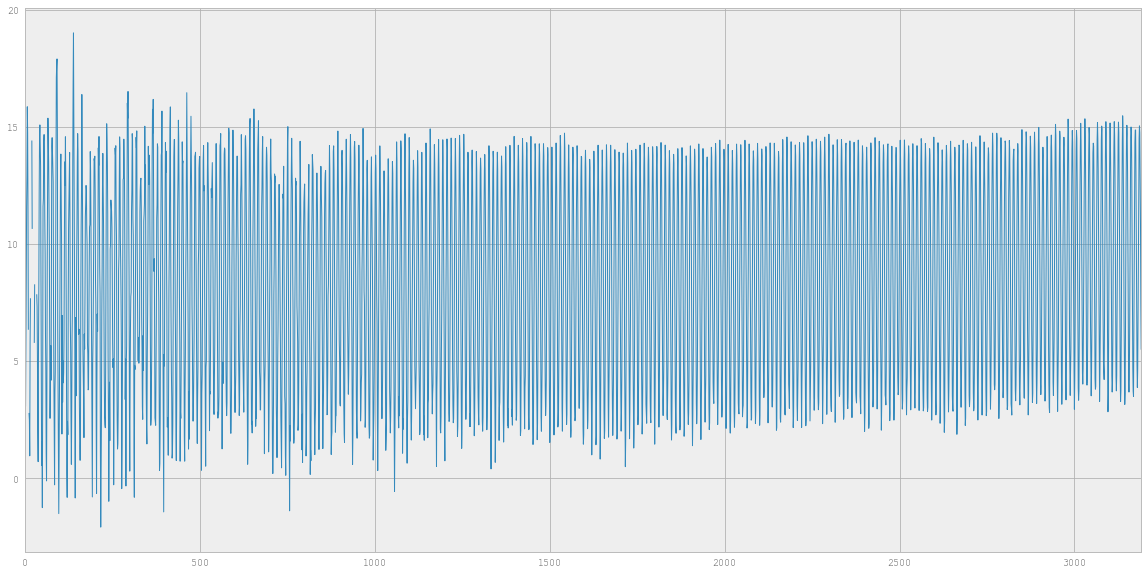


#### Description of dataset:

| COLUMNS       | DESCRIPTION   | TYPE  |ORDER|
| ------------- |---------------|-------|-----|
| DATE          |Date starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures|DateTime|1|
| LandAverageTemperature|This column gives information about global average land temperature in degrees Celsius.|Numeric|2|
| LandAverageTemperatureUncertainty|This column gives information about the 95% confidence interval around the average.|Numeric|3|
| LandMaxTemperature|This column gives information about global average maximum land temperature in degrees Celsius.|Numeric|4|
| LandMaxTemperatureUncertainty|This column gives information about the 95% confidence interval around the maximum land temperature.|Numeric|5|
| LandMinTemperature|This column gives information about global average minimum land temperature in degrees Celsius.|Numeric|6|
| LandMinTemperatureUncertainty|This column gives information about the 95% confidence interval around the minimum land temperature.|Numeric|7|
| LandAndOceanAverageTemperature|This column gives information about global average land and ocean temperature in degrees Celsius.|Numeric|8|
| LandAndOceanAverageTemperatureUncertainty|This column gives information about the 95% confidence interval around the global average land and ocean temperature.|Numeric|9|

#### Descriptive statistics for each column according to order of table above:

|         | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |                                   
|---------|---|---|---|---|---|---|---|---|
|count    |3180|3180|1992|1992|1992|1992|1992|1992|
|mean     |8.3747|0.9384|14.3506|0.4797|2.7435|0.4318|15.2125|0.1285|
|std	  |4.3813|1.0964|4.3095|0.5832|4.1558|0.4458|1.2740|0.0735|
|min	  |-2.0800|0.0340|5.9000|0.0440|-5.4070|0.0450|12.4750|0.0420|
|25%	  |4.3120|0.1867|10.21200|0.1420|-1.3345|0.1550|14.0470|0.0630|
|50%	  |8.6105|0.3920|14.7600|0.2520|2.9495|0.2790|15.2510|0.1220|
|75%	  |12.5482|1.4192|18.4515|0.5390|6.7787|0.4582|16.3962|0.1510|
|max	  |19.0210|7.8800|21.3200|4.3730|9.7150|3.4980|17.6110|0.4570|

In [1]:
import pandas as pd 
from scipy import stats
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
#import imsl.timeseries.auto_arima as auto_arima
pd.options.display.mpl_style = 'default'
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data=pd.read_csv("GlobalTemperatures.csv",sep=",") #Data read
global_temp = data[["dt","LandAverageTemperature"]] #I took 2 columns which are 'dt' and 'LandAverageTemperature'

* Only 'dt' and 'LandAverageTemperature' columns were taken from the dataset in this process. Now, it must be checked if 'LandAverageTemperature' column has any 'NaN' values. For this issue, '.isnan()' method is used and for using of this method 'Math' library must be imported. ('NaN' is standing for 'Not a Number'.)

In [3]:
total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temp["LandAverageTemperature"][i])):
        total=total+1
total
#global_temp includes 12 NaN Values so i have to fill these values with appropriate values.

12

When the codes were runned,it has been seen the column had 12 'NaN' values.Instead of dropping NaN values,to interpolate these values is more efficient. For this,'.interpolate(method='akima')' method were used. 
   ### AKIMA INTERPOLATION: 
- The interpolation method by Akima uses a continuously differentiable sub-spline built from piecewise cubic polynomials. The resultant curve passes through the given data points and will appear smooth and natural.There is no need to solve large equation systems and therefore this interpolation method is computationally very efficient. Because no functional form for the whole curve is assumed and only a small number of points is taken into account this method does not lead to unnatural wiggles in the resulting curve. The monotonicity of the specified data points is not necessarily retained by the resulting interpolation function. By additional constraints on the estimated derivatives a monotonicity preserving interpolation function can be constructed.<br>
- For a set of data points

$s_i$ = $s(x_i)$,        1 $ \leq$ i $ \leq$ k,(B1)
the interpolation function is defined as

s(x) = $a_0$ + $a_1$ . (x - $x_i$) + $a_2$ . $(x - x_i)^2$ + $a_3$ . $(x - x_i)^3$,        $x_i$ $ \leq$ x $ \leq$ $x_{i + 1}$.	(B2)

To determine the coefficients a0, a1, a2, and a3 of the interpolation polynomial for each interval [xi, xi + 1] the function values si and si + 1, and the first derivatives si' and si + 1' at the end points of the interval are used.

The first derivative $s_i$' of the interpolation function at $x_i$ is estimated from the data for this point and the next two points on each side of $x_i$. Using the ratios

dj = $ {\frac{s_{j+1} - s_{j}}{x_{j+1} - x_{j}}}$,        j = i - 2, i - 1, i, i + 1,	(B3)

and the weighting coefficients

$w_{i - 1}$	= | di + 1 - di|,	(B4)<br>
$w_i$	= | di - 1 - di - 2|, (B5)<br>
the estimated derivative si' is defined as

- $s_i$' = $ {\frac{w_{i - 1}\cdot d_{i - 1} + w_{i}\cdot d_{i}}{w_{i - 1} + w_{i}}}$.	(B6)<br>

Several special cases for $s_i$' have to be considered.

- $s_i$'	= $d_{i - 1}$	 ,        $d_{i - 2}$ = $d_{i-1}$, di $\neq$ di + 1	(B7)<br>
- $s_i$'	= $d_i$	 ,     $d_i$ = $d_{i + 1} $, $d_{i - 2}$ $\neq$ $d_{i - 1}$	(B8)<br>
- $s_i$'	= $d_{i - 1}$ = $d_i$	 	        $d_{i - 1}$ = $d_i$	(B9) <br>
- $s_i$'  = ${\frac{d_{i - 1} + d_{i}}{2}}$	 	 , $d_{i - 2}$ =$d_{i - 1}$ $\neq$ $d_i$ =$ d_{i + 1}$	(B10)

To be able to use (B.6) for calculating the derivatives s1', s2', sk - 1', and sk' additional ratios d-1, d0, dk, and dk + 1 have to be estimated.

- $d_1$	= 2 . $d_0$ - $d_1$	(B11)<br>
- $d_0$	= 2 . $d_1$ - $d_2$	(B12)<br>
- $d_k$	= 2 . $d_{k - 1}$ - $d_{k - 2}$	(B13)<br>
- $d_{k + 1}$	= 2 . $d_k$ - $d_{k - 1}$	(B14)<br>

The order of the interpolation function reduces to 2 for these intervals.

In [4]:
#I use the '.interpolate()' method for filling the missing values.
global_temperature = global_temp.interpolate(method = 'akima')
#Now I check NaN values again,then I'll show no missing values.
total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temperature["LandAverageTemperature"][i])):
        total=total+1
total

0

In [5]:
#Since data is too large to do seasonal decompose efficiently,i split them 4 pieces.
global_split=np.array_split(global_temperature,4)
global1=global_split[0]
global2=global_split[1]
global3=global_split[2]
global4=global_split[3]

In [6]:
#For eliminating any effects on dataset , I have to use 'sm.tsa.seasonal_decompose()' method,but firstly I must change Date index 
#to DateTime index.For this:
global1.reset_index(inplace=True)
global1['dt'] = pd.to_datetime(global1['dt'])
global1 = global1.set_index('dt')
#After I do index set-up,now: 
data_decompose1 = sm.tsa.seasonal_decompose(global1["LandAverageTemperature"])
#for global2
global2.reset_index(inplace=True)
global2['dt'] = pd.to_datetime(global2['dt'])
global2 = global2.set_index('dt')
#After I do index set-up,now: 
data_decompose2 = sm.tsa.seasonal_decompose(global2["LandAverageTemperature"])
#for global3
global3.reset_index(inplace=True)
global3['dt'] = pd.to_datetime(global3['dt'])
global3 = global3.set_index('dt')
#After I do index set-up,now: 
data_decompose3 = sm.tsa.seasonal_decompose(global3["LandAverageTemperature"])
#for global4
global4.reset_index(inplace=True)
global4['dt'] = pd.to_datetime(global4['dt'])
global4 = global4.set_index('dt')
#After I do index set-up,now: 
data_decompose4 = sm.tsa.seasonal_decompose(global4["LandAverageTemperature"])

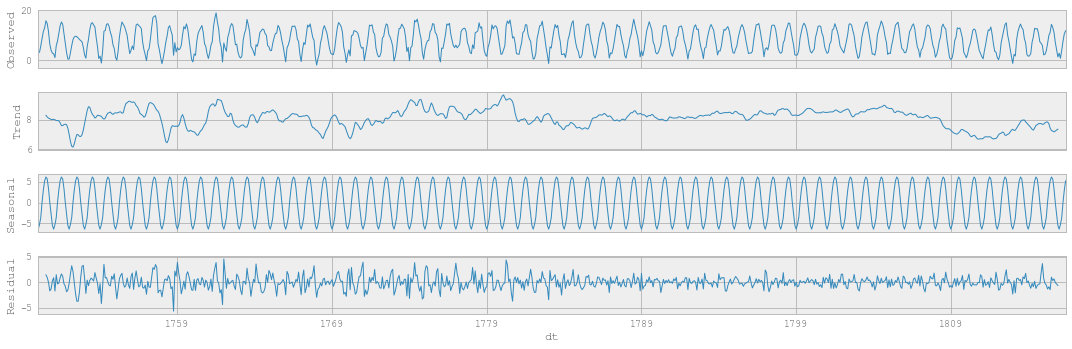

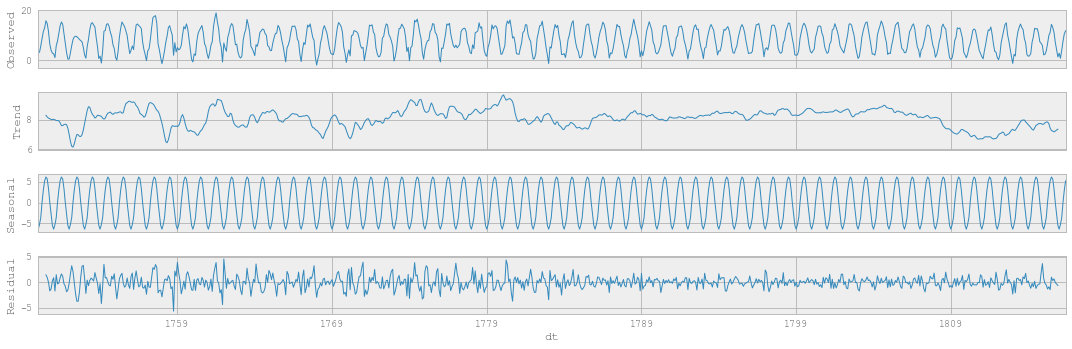

In [7]:
#If I plot the data_decompose1,I'll show these plots;
fig= data_decompose1.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()
#The first picture is my dataset's plot
#The second picture is trend on my dataset
#The third picture is seasonal effect on my dataset
#The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset
#If I plot the data_decompose2,I'll show these plots;
fig= data_decompose1.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()
#The first picture is my dataset's plot
#The second picture is trend on my dataset
#The third picture is seasonal effect on my dataset
#The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset

In [8]:
#For eliminating any effects on dataset , I have to use 'sm.tsa.seasonal_decompose()' method,but firstly I must change Date index 
#to DateTime index.For this:
global_temperature.reset_index(inplace=True)
global_temperature['dt'] = pd.to_datetime(global_temperature['dt'])
global_temperature = global_temperature.set_index('dt')
#After I do index set-up,now: 

# STL:A Seasonal-Trend Decomposition Procedure Based on Loess

###### STL is a filtration procedure to decompose a time series into trend,seasonal,and remainder component. 
<br>
$ Y_{v} = T_{v} + S_{v} + R_{v} $  (T:trend , S:seasonal , R:remainder) for v = 1 to N
<br>
###### The aim of the STL is to enhance a decomposition procedure and a companion application that provide the following interdependent criteria:
<br>

- Easy to design and to use, 
- Flexibility in specifying the amounts of variation in the trend and seasonal components,
- Specification of the number of observations per loop of the seasonal component to any integer greater than 1,
- The decomposing ability to series with NaN values,
- Robust trend and seasonal components that are not distorted by transient,aberrant behavior in the data,
- Easy computer implementation and fast computation,even for long time series.<br>

#####  In this figure,we see the decomposition: 
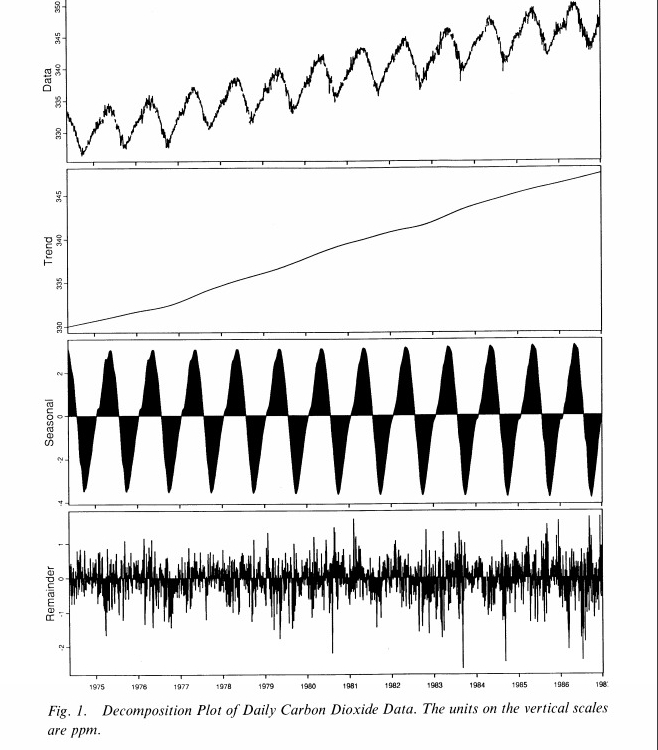

###### STL includes many parameters that must be picked by the data analyst. For some parameters,a priori prescribed values can be used. The choices of the other parameters have to be based upon the features of the data;diagnostic methods are given that help the data analyst to make these choices.
#### LOESS:
- We assume that $ x_{i} $  and $ y_{i} $ for i=1 to N are measurements of an independent and dependent variable,respectively. The Loess regression curve,$ \hat {g} $(x),is a smoothing of y given x that could be calculated for any value of independent variable along the scale of x. Loess is not only defined at $x_{i}$ but also defined everywhere. This is an excellent property that in STL let us to handle these missing values and detrend the seasonal component in a straightforward way.
- Loess can also be used to smooth dependent variable y as a function of any number of independent variables;however,for STL the case has only one independent variable.
###### $\hat{g} $(x)  is calculated in the following way:
- Firstly,we choose a positive integer q and assume that q $ \leq $ n. And then we choose q values of the $x_{i}$ which are closest to independent variable x and each of them is given a "neighborhood weight" based upon its distance from x. Let $\lambda_{q}$(x) be distance of the $q th$ farthest from x. Let $W$ be the tricube weight function: <br> $W$(u) $=$  \begin{cases} 
      (1-u^3)^3& ,0 \leq x < 1 \\
      0 & ,1\geq x 
   \end{cases} <br>
* The neighborhood weight for any $x_{i}$ is: <br> $v_i = $ W($\frac{|x_i - x|}{\lambda_{q}(x)}$) <br>

- So $x_i$ close to x have the biggest weights;the weights go down as the $x_i$ go up in distance from x and become zero at the $qth$ farthest point. The following step is to fit a polynomial of degree 'd' to the data with weight $v_i$(x) at ($x_i$,$y_i$)

* Now, we assume that q $>$ n. $\lambda_{n}$(x) is the distance from x to the farthest $x_i$. For q $ > $ n we define $\lambda_{q}$(x) by <br> $\lambda_{q}$(x) = $\lambda_{n}$(x)$\frac{q}{n}$

### The Overall Design: Inner and Outer Loops:

- STL includes two recursive procedures: an inner loop nested inside an outer loop. Firstly:

#### The Inner Loop:
- Each pass from inner loop includes a seasonal smoothing that updates the seasonal component, followed by a trend smoothing that updates the trend component,and this process(each complete run) has $n_{(i)}$ such passes. <br> Let $S_{v}^k$ and $T_{v}^k$ be the seasonal and trend components at the end of the $kth$ pass. (v = 1 to N) These components are defined not only where $Y_v$ is defined but also where $Y_v$ is not defined , which means these are defined at all times v = 1 to N. The next update-$(k+1)st$- is calculated in the following way:<br>
<br>
- Step 1: $(Detrending)$: We calculate the $Y_v$-$T_v$ which is detrended series. If $Y_v$ is not defined at a particular time position,then $T_v$ could not be calculated for that position.<br> Suppose the number of the observations in each period,or cycle,of the seasonal component is $n_p$. $Cycle-subseries$ refer to each of these $n_p$ subseries.<br>
<br>
- Step 2: $(Cycle-subseries$ $  Smoothing)$:Each cycle-subseries of the detrended series is smoothed by Loess with q = $n_s$ and d=1.We calculate smooth values for all time positions of the cycle-subseries,including where $Y_v$ is not defined and at positions prior to the first time position of the cycle-subseries and after the last.<br>
<br>
- Step 3: $(Low-pass$ $ Filtering$  $ of$  $ Smoothed$ $ Cycle-subseries)$:We apply the "low-pass filter" to $C_v^{(k+1)}$.The filter includes a moving average of length $n_p$,followed by another moving average of length $n_p$,followed by a moving average of length 3,followed by a Loess smoothing with d = 1 and q = $n_l$. <br>
<br>
- Step 4: $(Detrending$ $of$ $ Smoothed$ $Cycle-subseries)$ :$(k+1)st$ loop is $S_v^{(k+1)}$ = $C_v^{(k+1)}$ - $L_v^{(k+1)}$ for v=1 to N. $L_v^{(k+1)}$ is subtracted to prevent low-frequency power from entering the seasonal component.<br>
<br>
- Step 5: $(Deseasonalizing)$: We calculate the $Y_v$-$S_v^{(k+1)}$ which is deseasonalized series. If $Y_v$ is not defined at a particular time position,then $S_v$ could not be calculated for that position.<br>
<br>
- Step 6: $(Trend$ $ Smoothing)$: Loess with q=$n_t$ and d = 1 smooths the deseasonalized series.We calculate smooth values at all time positions for v= 1 to N even where $Y_v$ has missing values.The trend component from $(k+1)st$ loop ,$T_v^{(k+1)}$ for v=1 to N, is the set of smooth values. 

#### The Outer Loop:
- Assume that we have executed an initial run of the inner loop to determine,$T_v$ and $S_v$,of the trend and seasonal components. Then the remainder is: <br> $R_v$ = $Y_v$-$T_v$-$S_v$ <br> $R_v$ is not defined where $Y_v$ has missing values,unlike $T_v$ and $S_v$ .We define a $weight$ for each time point where $Y_v$ is observed. These $robustness$ $weights$  reflect how extreme $R_v$ is.An outlier in the data that results in a very large $|R_v|$ has a small or zero weight.Suppose that : h = 6 median(|$R_v$|) , then the robustness weight at time point $v$ is: <br> $p_v$ = B($\frac{|R_v|}{h}$) where B is the bisquare weight function:<br> $B(u) = $ \begin{cases} 
      (1-u^2)^2& ,0 \leq x < 1 \\
      0 & ,1\geq x 
   \end{cases} <br>
- In this process,the inner loop is repeated;however,the neighborhood weight for a value at time $v$ is multiplied by the robustness weight $p_v$,in the smoothings of step 2 and 6.A total $n_o$ times we apply these robustness iterations of the outer loop . We do not put the value of $T_v^{(0)}$ is 0 each time we go into the inner loop after the initial pass,instead of it we use the trend component from step 6 of the earlier inner loop.  
### Choosing the STL Parameters:
* STL has 6 parameters. These are:$n_p$,$n_i$,$n_o$,$n_l$,$n_s$,$n_t$.<br>
-- $n_p$: The number of observations in each cycle of the seasonal component.<br>
-- $n_i$: The number of passes through the inner loop. <br>
-- $n_o$: The number of robustness iterations of outer loop. <br>
-- $n_l$: The smoothing parameter for the low-pass filter. <br>
-- $n_t$: The smoothing parameter for the trend component.<br>and<br>
-- $n_s$: The smoothing parameter for the trend component. <br>
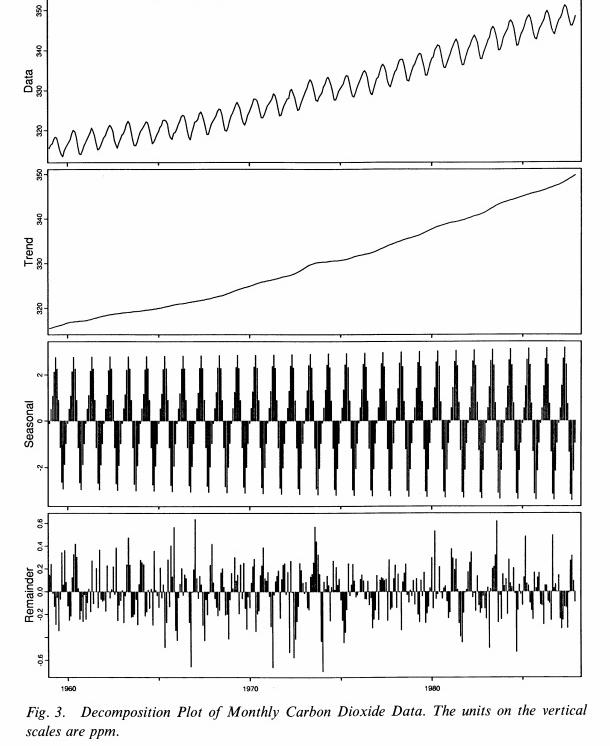
-- We see in the figure STL parameters as:<br>$n_p$=12  ,  $n_i$=2  ,  $n_o$=0  ,  $n_l$=13  ,  $n_t$=19  ,and $n_s$=35.<br>
## i) $\underline{n_p}$:
<br>
- This parameter is choosen as number of observations in each cycle. For example,if the data has yearly periodicity,then $n_p$ is 365 for the daily data,$n_p$ is 12 for the monthly data. 
## ii) $\underline{n_i}$ and $\underline{n_o}$:
<br>
- STL robust estimations is necessary that when prior knowledge of the data or diagnostic controlling points out that non-Gaussian behavior in the time-series causes extreme and transient variation. If there are not these variations,then we neglect robustness iterations and and set $n_o$ = $0$. For example in the first figure,$n_o$ = $0$ because of not existing aberrant behavior. Firstly,we assume that no robustness. We want to choose $n_i$ large enough because of updating the seasonal and trend components converges. In many cases,we pick as $n_i$ = 1, but in some cases we choose $n_i$ = 2 because of providing near certainty of convergence.<br> Now,we assume that we need robustness iterations and we want to pick $n_o$ is large enough because of robust estimates the seasonal and trend components converges. For doing this,there are 2 reasons for always choosing as $n_i$ = 1. The first one is the convergence of inner loop is very rapid. The second one has to do with a general principle of unconstrained optimization when there are nested iterations.<br>
$\frac{max|U_v^{(k)}-U_v^{(k+1)}|}{maxU_v^{(k)}-minU_v^{(k+1)}}$ $< 0.01$  <br>This is the convergence criterian and stop criterion and stop the iterations when the criterion is satisfied. (Suppose that $U_v^{(k)}$ and $U_v^{(k+1)}$ are successive iterates of either a trend or seasonal component.)
## iii) $\underline{n_l}$:
<br>
* $n_l$ is always taken to be equal to the least odd integer greater than or equal to $n_p$. This choice of $n_l$ enable to prevent competing of variation in the data of seasonal and trend components. For example,in the second figure,$n_l$ is 13.  
## iv) $\underline{n_s}$:
<br>
* As the seasonal smooth parameter $n_s$ increases,each cycle-subseries becomes smoother. we always want to choose as $n_s$ is odd and also is at least 7. The choice of $n_s$ adjusts the variation in the data that generates the seasonal component and to pick proper variation depends on the characteristics of series.
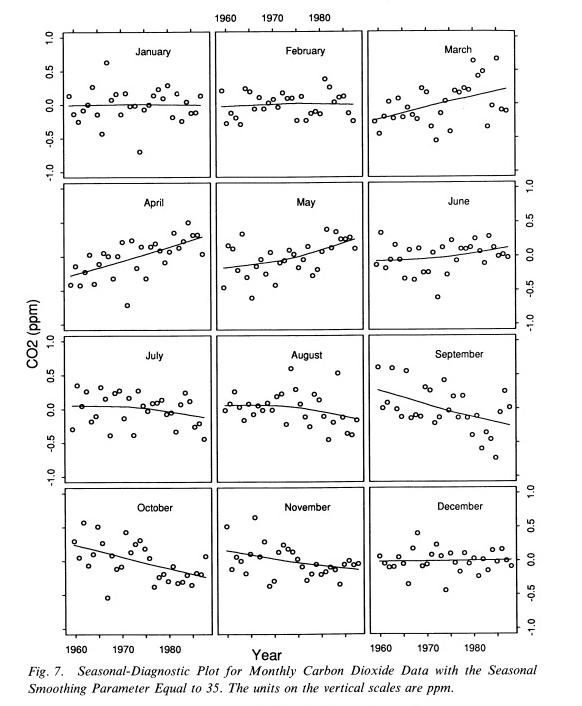
- This figure is the sample of diagnostic graphical method that can assist the choice of $n_s$.Each panel of the figure graphs two sets of values for a particular month. Let $\bar{s}_k$ be the mean of the values of the cycle-subseries of the seasonal component for the $k-th$ month. The curve on the panel for the $k-th$ month graphs those seasonal values minus their mean $\bar{s}_k$. The circles graph the values of the $k-th$ cycle-subseries of the seasonal plus the remainder,also with $\bar{s}_k$ subtracted.(The reason for subtracting $\bar{s}_k$ is to center the values on each panel at zero.) This diagnostic method is $seasonal-diagnostic$ $plot$.This helps us to decide how much of the variation in the data other than trend should go into the seasonal component and how much into the remainder.
## v) $\underline{n_t}$:
<br>
- As the trend smoothing parameter $n_t$ increases,the trend component $T_v$, extracts less variation $X_v$ and becomes smoother. If a component is necessary for describing certain low-frequency variation in the data,then we apply a $post-trend$ $smoothing$,which means a low pass filter like Loess,is carried out to $T_v$ + $R_v$,the data with the seasonal component removed,to get a component with the intended variation.<br> And we choose $n_t$ in this way::
$n_t$ $\geq$ $\frac{1.5n_p}{1-1.5n_p^{-1}}$ 

In [10]:
#After I do index set-up,now: 
data_decompose = sm.tsa.seasonal_decompose(global_temperature["LandAverageTemperature"])

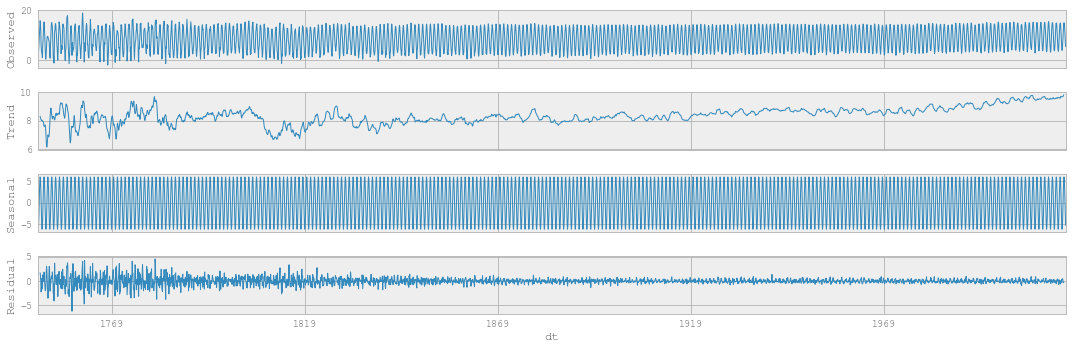

In [11]:
#If I plot the data_decompose,I'll show these plots;
fig= data_decompose.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()
#The first picture is my dataset's plot
#The second picture is trend on my dataset
#The third picture is seasonal effect on my dataset
#The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset

In [14]:
#Since I still observed seasonal effect on my dataset ,i repeated this process.
data_decomposee=sm.tsa.seasonal_decompose(data_decompose.resid.dropna())

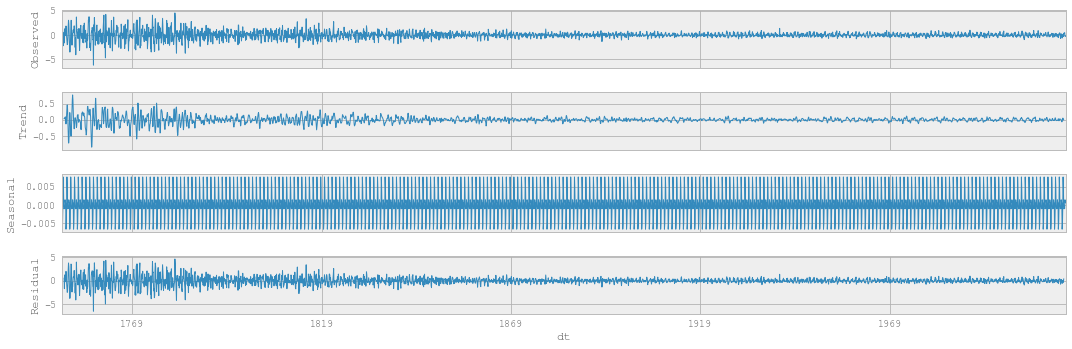

In [15]:
fig= data_decomposee.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()

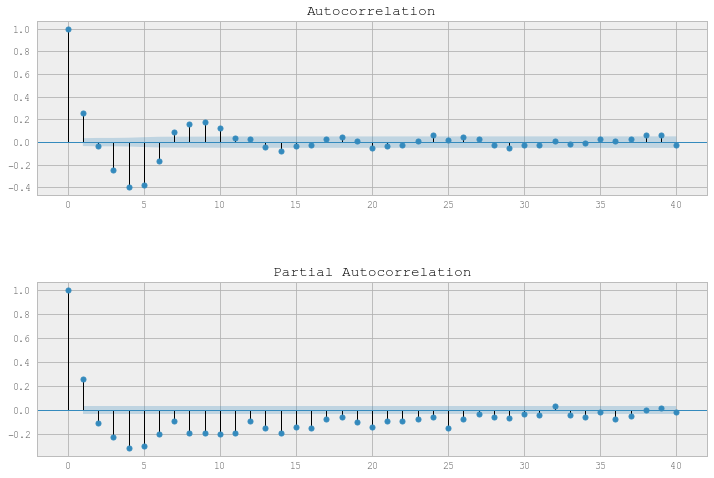

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_decomposee.resid.dropna(), lags=40 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_decomposee.resid.dropna(), lags=40, ax=ax2)
plt.show()

In [17]:
data_decomposition = data_decompose.resid.interpolate(method='akima')

In [18]:
model = ARIMA(data_decomposition.dropna(), order=(11,1,0))

In [19]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                ARIMA Model Results                                 
Dep. Variable:     D.LandAverageTemperature   No. Observations:                 3179
Model:                      ARIMA(11, 1, 0)   Log Likelihood               -3456.515
Method:                             css-mle   S.D. of innovations              0.717
Date:                      Wed, 13 Dec 2017   AIC                           6939.030
Time:                              18:16:15   BIC                           7017.867
Sample:                          08-01-1750   HQIC                          6967.304
                               - 06-01-2015                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.679e-05      0.002      0.010      0.992      -0.003       0.003
ar.L1.D.LandAverageT

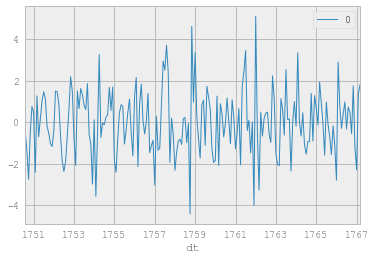

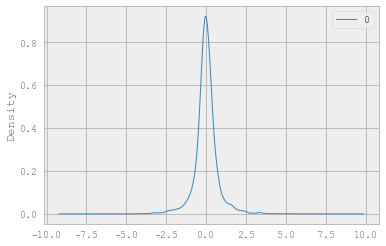

                 0
count  3179.000000
mean     -0.001381
std       0.718553
min      -4.428846
25%      -0.281678
50%      -0.013696
75%       0.279803
max       5.103610


In [20]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.head(200).plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


In [23]:
#convert to standard normal dist.
residual=(residuals+0.001381)/(0.718553)

In [24]:
data_normality=stats.kstest(residual,'norm')

In [26]:
data_normality

KstestResult(statistic=0.99999999999939637, pvalue=0.0)